In [125]:
import numpy as np 
from re import A # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import Perceptron, LogisticRegression


In [126]:
data=pd.read_csv("Heart_Disease_Prediction.csv")


In [127]:
clean_data = data.copy()
clean_data['Age'] = (clean_data['Age']<100) 
clean_data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,True,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,True,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,True,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,True,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,True,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,True,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,True,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,True,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,True,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [128]:
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [129]:

data.rename(columns = {'Heart Disease':'HeartDisease'}, inplace = True)
 
data.rename(columns = {'Slope of ST':'SlopeofST'}, inplace = True)

data.rename(columns = {'ST depression':'STdepression'}, inplace = True)
print(data.columns)

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'STdepression', 'SlopeofST',
       'Number of vessels fluro', 'Thallium', 'HeartDisease'],
      dtype='object')


In [130]:
data['HeartDisease'] = data['HeartDisease'].map({'Presence': 0, 'Absence': 1})
data.HeartDisease



0      0
1      1
2      0
3      1
4      1
      ..
265    1
266    1
267    1
268    1
269    0
Name: HeartDisease, Length: 270, dtype: int64

In [131]:
scaler = MinMaxScaler()#StandardScaler() 
data[["Age","BP","Cholesterol","Max HR"]] = scaler.fit_transform(data[["Age","BP","Cholesterol","Max HR"]])

In [132]:
data.head

<bound method NDFrame.head of           Age  Sex  Chest pain type        BP  Cholesterol  FBS over 120  \
0    0.854167    1                4  0.339623     0.447489             0   
1    0.791667    0                3  0.198113     1.000000             0   
2    0.583333    1                2  0.283019     0.308219             0   
3    0.729167    1                4  0.320755     0.312785             0   
4    0.937500    0                2  0.245283     0.326484             0   
..        ...  ...              ...       ...          ...           ...   
265  0.479167    1                3  0.735849     0.166667             1   
266  0.312500    1                2  0.245283     0.312785             0   
267  0.562500    0                2  0.433962     0.383562             0   
268  0.583333    1                4  0.433962     0.150685             0   
269  0.791667    1                4  0.622642     0.365297             0   

     EKG results    Max HR  Exercise angina  STdepression

In [133]:
data.isnull().sum()


Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
STdepression               0
SlopeofST                  0
Number of vessels fluro    0
Thallium                   0
HeartDisease               0
dtype: int64

In [134]:
data[data.isnull().any(axis=1)].head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,STdepression,SlopeofST,Number of vessels fluro,Thallium,HeartDisease


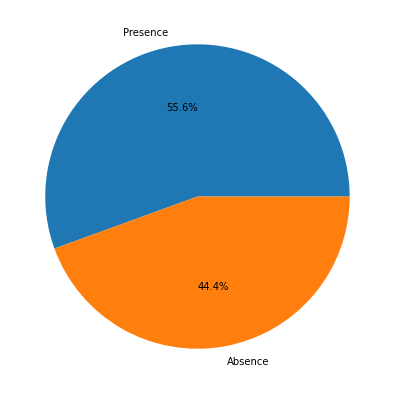

In [135]:

plt.figure(figsize=(20,7))
plt.pie(data['HeartDisease'].value_counts(), labels=['Presence', 'Absence'], autopct='%1.1f%%')
plt.show()

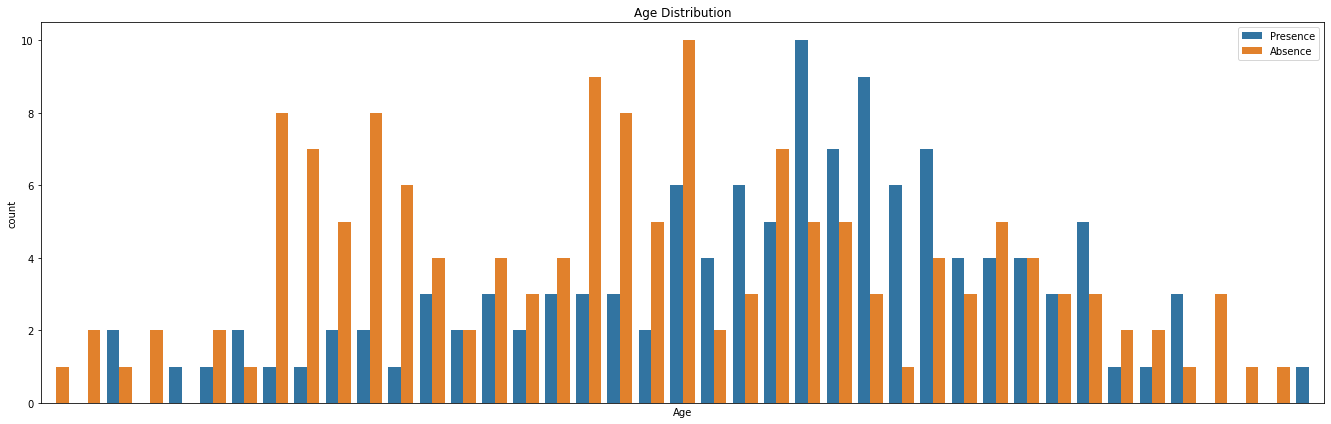

In [136]:
plt.figure(figsize=(23,7))
sns.countplot(x=data["Age"], data=data, hue='HeartDisease')
plt.legend(['Presence', 'Absence'], loc='upper right')
plt.title("Age Distribution")
plt.xticks([])
plt.show()

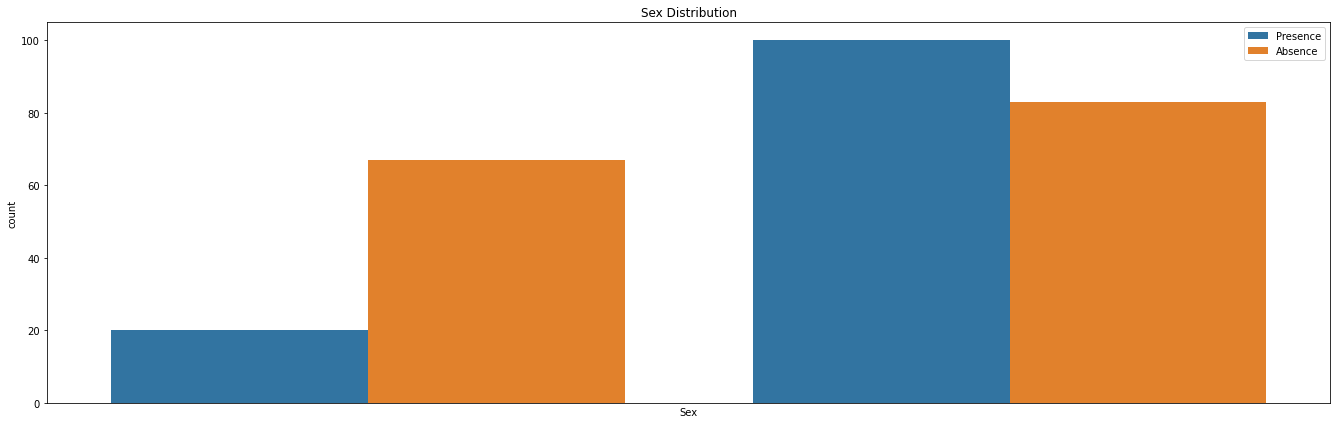

In [166]:
plt.figure(figsize=(23,7))
sns.countplot(x=data["Sex"], data=data, hue='HeartDisease')
plt.legend(['Presence', 'Absence'], loc='upper right')
plt.title("Sex Distribution")
plt.xticks([])
plt.show()

C:\Users\hemar\AppData\Local\Temp/ipykernel_12948/1317563685.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax=ax,bins=30)


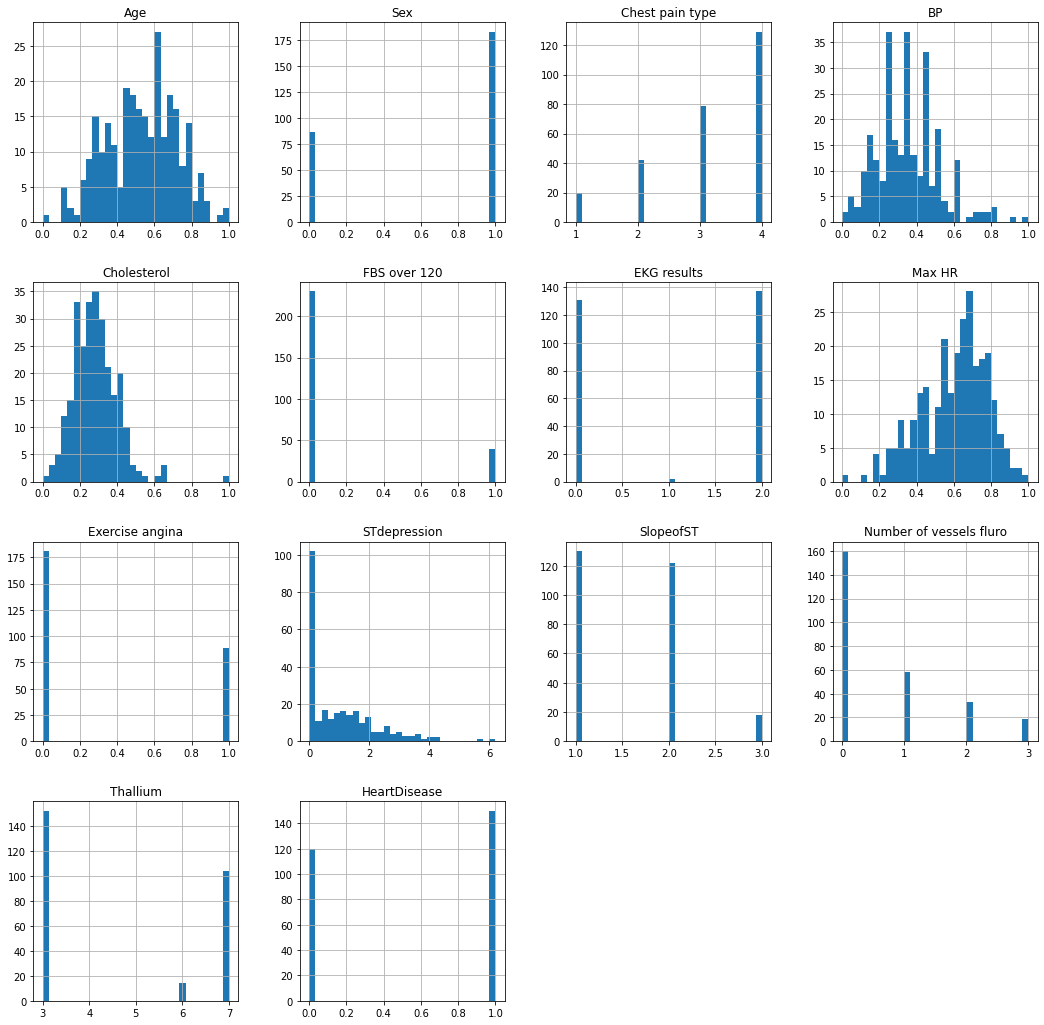

In [137]:
fig=plt.figure(figsize=(18,18))
ax=fig.gca()
data.hist(ax=ax,bins=30)
plt.show()

In [138]:

matrix = data.corr().round(2)
print(matrix)


                          Age   Sex  Chest pain type    BP  Cholesterol  \
Age                      1.00 -0.09             0.10  0.27         0.22   
Sex                     -0.09  1.00             0.03 -0.06        -0.20   
Chest pain type          0.10  0.03             1.00 -0.04         0.09   
BP                       0.27 -0.06            -0.04  1.00         0.17   
Cholesterol              0.22 -0.20             0.09  0.17         1.00   
FBS over 120             0.12  0.04            -0.10  0.16         0.03   
EKG results              0.13  0.04             0.07  0.12         0.17   
Max HR                  -0.40 -0.08            -0.32 -0.04        -0.02   
Exercise angina          0.10  0.18             0.35  0.08         0.08   
STdepression             0.19  0.10             0.17  0.22         0.03   
SlopeofST                0.16  0.05             0.14  0.14        -0.01   
Number of vessels fluro  0.36  0.09             0.23  0.09         0.13   
Thallium                 

In [139]:

corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,STdepression,SlopeofST,Number of vessels fluro,Thallium,HeartDisease
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,-0.212322
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,-0.297721
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,-0.417436
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,-0.155383
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,-0.118021
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,0.016319
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,-0.182091
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,0.418514
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,-0.419303
STdepression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,-0.417967


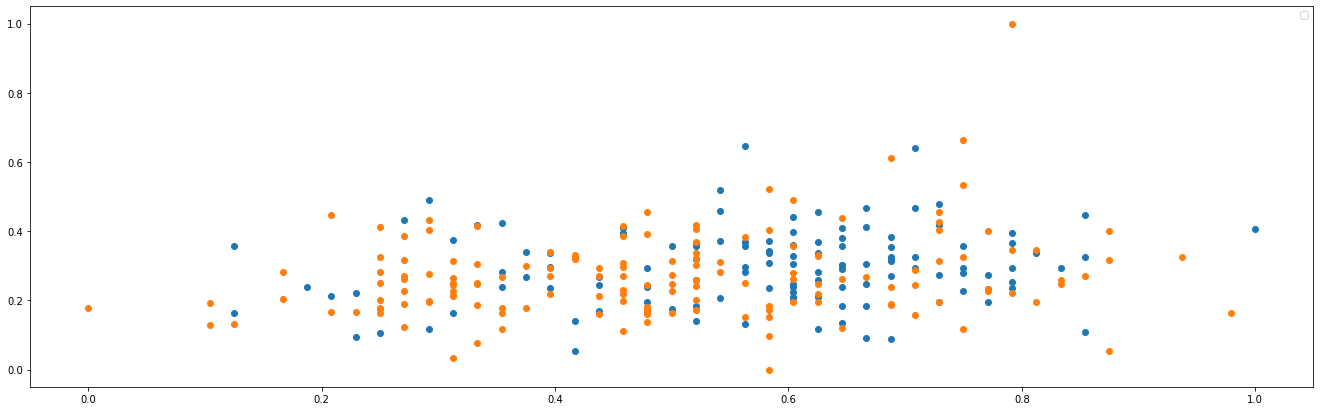

In [140]:
plt.figure(figsize=(23,7))
noHeartDisease = data[data["HeartDisease"] == 0]
heartDisease = data[data["HeartDisease"] == 1]   
plt.legend(['noHeartDisease', 'heartDisease'], loc='upper right')   
plt.scatter(noHeartDisease.Age, noHeartDisease.Cholesterol, cmap="blue", label="No Heart Disease")
plt.scatter(heartDisease.Age, heartDisease.Cholesterol, cmap="red", label="Heart Disease")
plt.show()

In [141]:
x=data.drop(['HeartDisease'],axis=1)
y=data["HeartDisease"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

>2, train: 0.764, test: 0.704
>3, train: 0.792, test: 0.685
>4, train: 0.819, test: 0.648
>5, train: 0.819, test: 0.648
>6, train: 0.819, test: 0.648
>7, train: 0.833, test: 0.741
>8, train: 0.856, test: 0.815
>9, train: 0.866, test: 0.796
>10, train: 0.870, test: 0.833
>11, train: 0.870, test: 0.833
>12, train: 0.870, test: 0.833
>13, train: 0.880, test: 0.852
>14, train: 0.880, test: 0.852
>15, train: 0.880, test: 0.852
>16, train: 0.880, test: 0.852
>17, train: 0.880, test: 0.852
>18, train: 0.880, test: 0.852
>19, train: 0.880, test: 0.852
>20, train: 0.880, test: 0.852


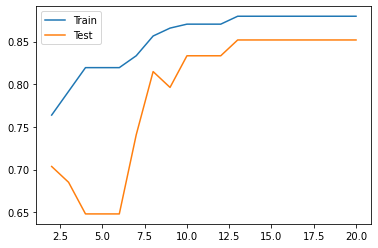

In [142]:
train_scores, test_scores = list(), list()
values = [i for i in range(2, 21)]

for i in values:
	
	modell = DecisionTreeClassifier( max_leaf_nodes = i, min_samples_leaf = 6, max_depth= 6,random_state=42)
	modell.fit(x_train, y_train)

	train_yhat = modell.predict(x_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	
	test_yhat = modell.predict(x_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores,  label='Train')
plt.plot(values, test_scores,  label='Test')
plt.legend()
plt.show()

In [143]:
# model = LogisticRegression(max_iter=200)
# model.fit(x_train, y_train)
# print(f"train score : {model.score(x_train, y_train)}")
# print(f"test score : {model.score(X_test, y_test)}")

In [144]:
dt=DecisionTreeClassifier( max_leaf_nodes = 8, min_samples_leaf = 5, max_depth= 5,random_state=42)

dt=dt.fit(x_train,y_train)

In [145]:
training_accuracy = []
test_accuracy = []
labels=[]
labels.append(1);
y_predict_train = dt.predict(x_train)
training_accuracy.append(accuracy_score(y_train, y_predict_train))


In [146]:
y_predict_test = dt.predict(x_test)
test_accuracy.append(accuracy_score(y_test, y_predict_test))


In [147]:
training_accuracy

[0.8564814814814815]

In [148]:


test_accuracy


[0.8148148148148148]

In [149]:

score = 0
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_predict_train = knn.predict(x_train)
s=accuracy_score(y_train, y_predict_train)
y_predict_test = knn.predict(x_test)
acc_score = accuracy_score(y_test, y_predict_test)

    
        

In [150]:
training_accuracy.append(s)
training_accuracy

[0.8564814814814815, 0.8564814814814815]

In [151]:
test_accuracy.append(acc_score)
test_accuracy


[0.8148148148148148, 0.8888888888888888]

In [152]:

# scaler = StandardScaler() 
# X_train_scaler = scaler.fit_transform(x_train)
# X_test_scaler = scaler.transform(X_test)
model = Perceptron(max_iter=40, eta0=0.1, random_state=0)
model.fit(x_train,y_train.ravel())
p_train = model.predict(x_train)
a=accuracy_score(y_train,p_train)
training_accuracy.append(a);


# mlp = MLPClassifier(
#        max_iter=100,
#        alpha=0.1,
#        activation='logistic',
#        solver='adam',
#        random_state=42
#       )
# mlp.fit(x_train, y_train)

# mlp_predict = mlp.predict(x_train) 

# training_accuracy.append(accuracy_score(y_train,mlp_predict))



In [153]:
mlp_predict_test = model.predict(x_test) 
test_accuracy.append(accuracy_score(y_test,mlp_predict_test))


In [154]:
training_accuracy

[0.8564814814814815, 0.8564814814814815, 0.8055555555555556]

In [155]:
test_accuracy

[0.8148148148148148, 0.8888888888888888, 0.7777777777777778]

In [156]:
labels.append(2)
labels.append(3)


In [157]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=1,random_state=22) #criterion can be also : entropy 
X_train, X_test, Y_train, Y_test = train_test_split(x,y,random_state=42,test_size=0.3)
RandomForestClassifierModel.fit(X_train, Y_train)

ty=RandomForestClassifierModel.predict(X_train)

accc_score_train =accuracy_score(Y_train, ty)

y_pred = RandomForestClassifierModel.predict(X_test)
accc_score_test = accuracy_score(Y_test,y_pred)





In [158]:
training_accuracy.append(accc_score_train)
test_accuracy.append(accc_score_test)


In [159]:
training_accuracy


[0.8564814814814815,
 0.8564814814814815,
 0.8055555555555556,
 0.8465608465608465]

In [160]:
test_accuracy

[0.8148148148148148,
 0.8888888888888888,
 0.7777777777777778,
 0.8395061728395061]

In [161]:
labels.append(4)

[Text(0, 3, '0.814815'),
 Text(0, 3, '0.888889'),
 Text(0, 3, '0.777778'),
 Text(0, 3, '0.839506')]

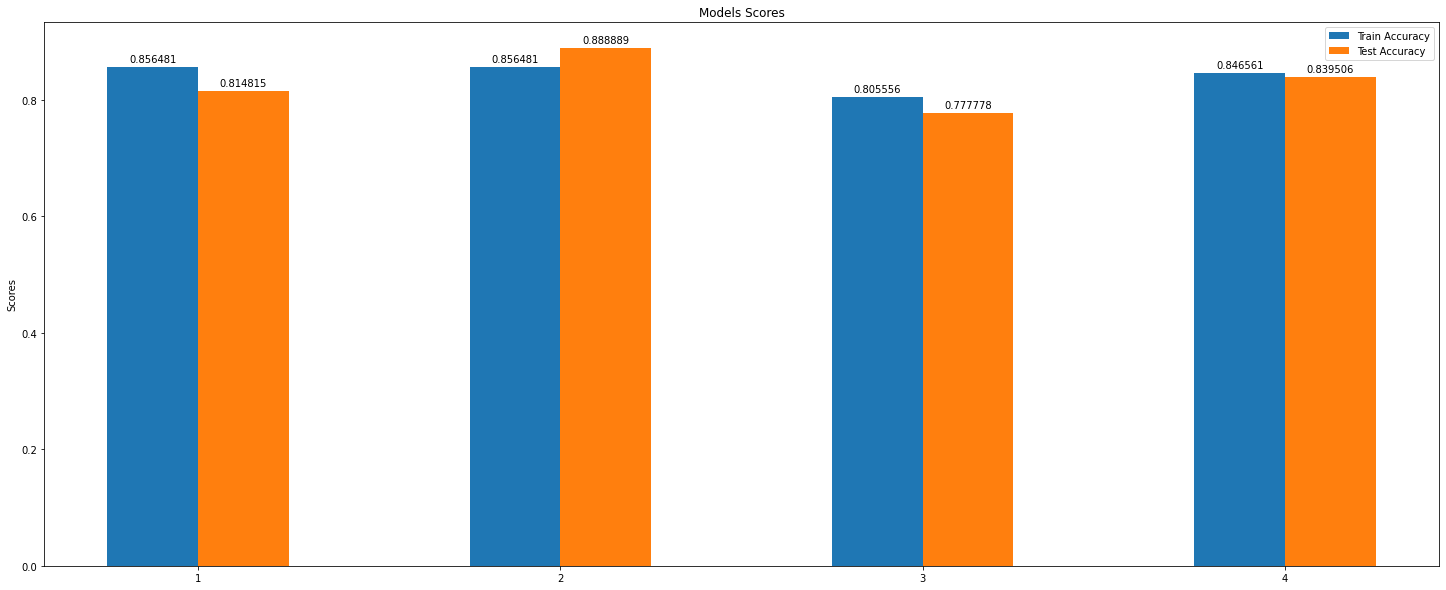

In [162]:
labels 
train_scores = training_accuracy
test_scores = test_accuracy

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(25,10))
rects1 = ax.bar(x - width/2, train_scores, width, label='Train Accuracy')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test Accuracy')

# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Models Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();
ax.bar_label(rects1, padding=3) # bar_label exists in matplotlib versions > 3.4
ax.bar_label(rects2, padding=3)

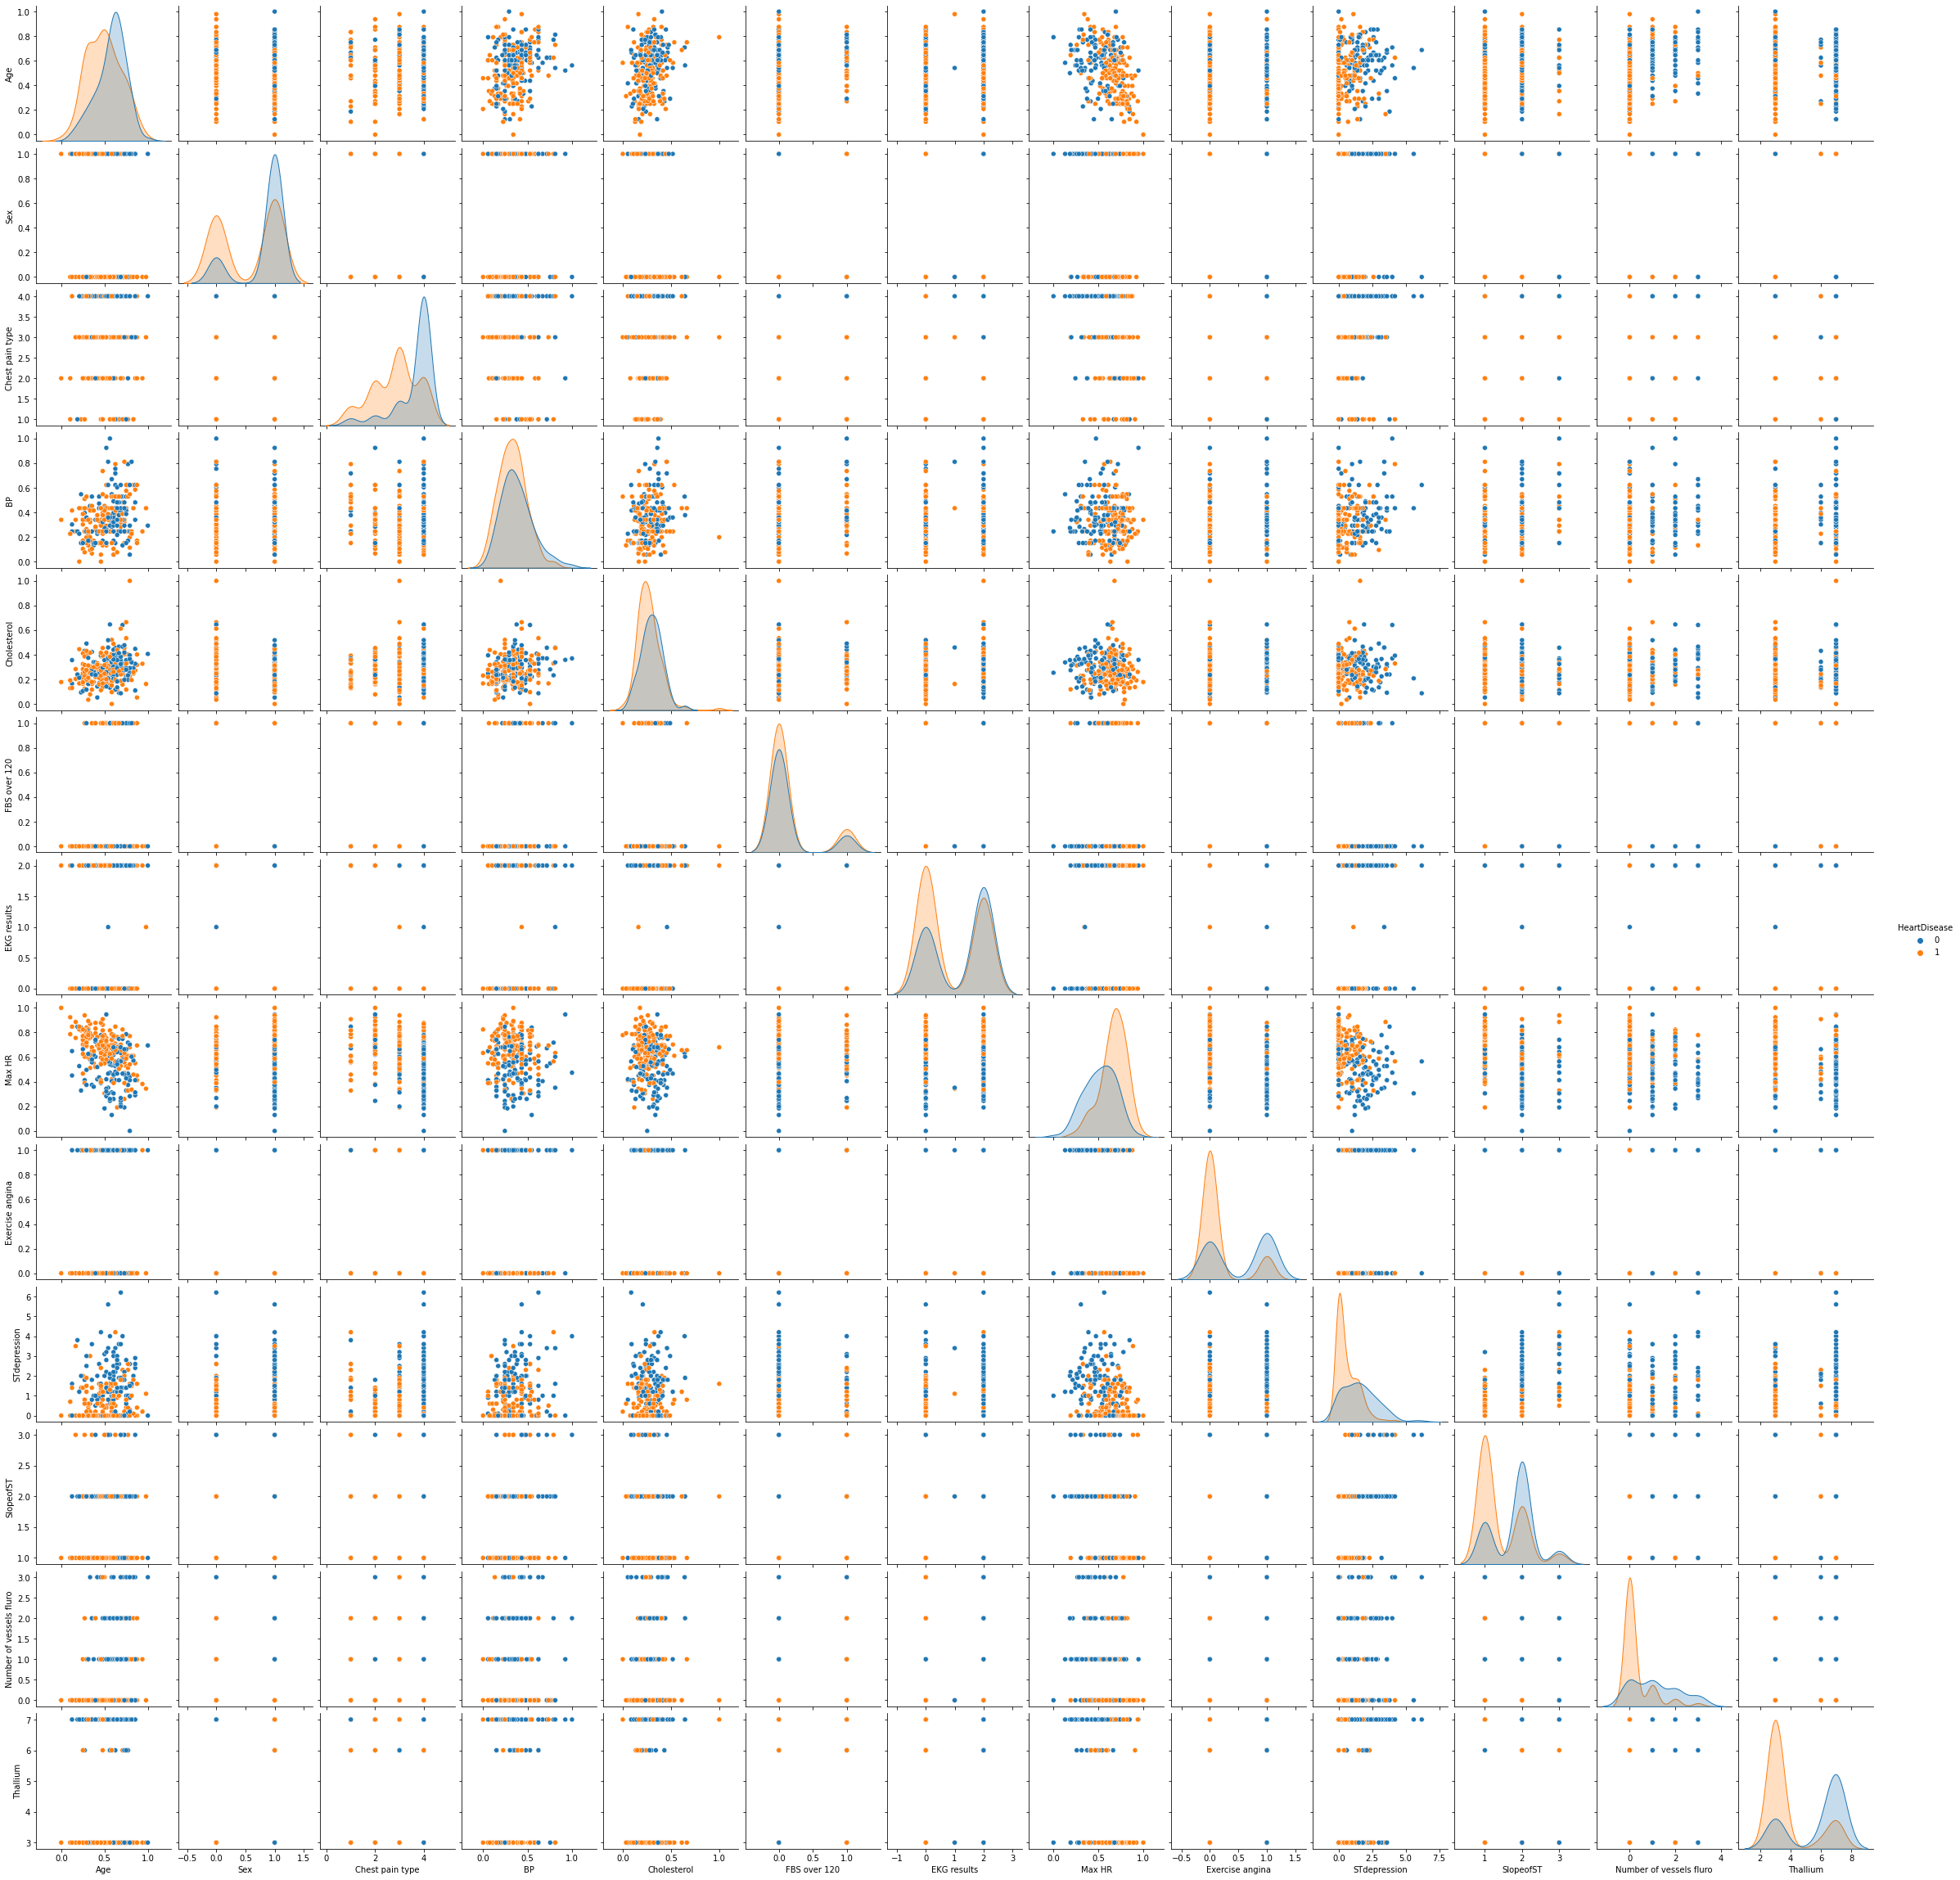

In [163]:
sns.pairplot(data, hue='HeartDisease')
plt.show()

In [164]:
data[data.columns[1:]].corr()['HeartDisease'][:].sort_values(ascending=False).to_frame()

,HeartDisease
HeartDisease,1.000000
Max HR,0.418514
FBS over 120,0.016319
Cholesterol,-0.118021
BP,-0.155383
EKG results,-0.182091
Sex,-0.297721
SlopeofST,-0.337616
Chest pain type,-0.417436
STdepression,-0.417967


>1, train: 1.000, test: 0.796
>2, train: 0.884, test: 0.796
>3, train: 0.884, test: 0.870
>4, train: 0.866, test: 0.852
>5, train: 0.856, test: 0.889
>6, train: 0.843, test: 0.870
>7, train: 0.856, test: 0.907
>8, train: 0.843, test: 0.889
>9, train: 0.843, test: 0.852
>10, train: 0.824, test: 0.870
>11, train: 0.838, test: 0.870
>12, train: 0.829, test: 0.852
>13, train: 0.833, test: 0.815
>14, train: 0.838, test: 0.815
>15, train: 0.833, test: 0.833
>16, train: 0.819, test: 0.796
>17, train: 0.819, test: 0.833
>18, train: 0.829, test: 0.833
>19, train: 0.810, test: 0.833
>20, train: 0.819, test: 0.815
>21, train: 0.824, test: 0.833
>22, train: 0.819, test: 0.796
>23, train: 0.810, test: 0.778
>24, train: 0.815, test: 0.778
>25, train: 0.815, test: 0.778
>26, train: 0.806, test: 0.778
>27, train: 0.796, test: 0.778
>28, train: 0.796, test: 0.778
>29, train: 0.796, test: 0.778
>30, train: 0.806, test: 0.778
>31, train: 0.792, test: 0.778
>32, train: 0.787, test: 0.778
>33, train: 0.792

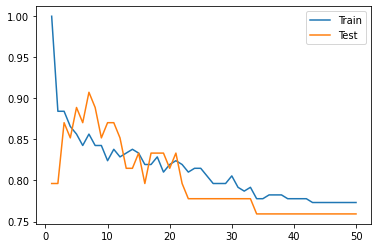

In [165]:

train_scores, test_scores = list(), list()
values = [i for i in range(1, 51)]

for i in values:

	model = KNeighborsClassifier(n_neighbors=i)
	
	model.fit(x_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(x_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(x_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
plt.plot(values, train_scores,  label='Train')
plt.plot(values, test_scores,  label='Test')
plt.legend()
plt.show()